In [730]:
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/schools_complete.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/students_complete.csv'), on='school_name')

# Calculate the mean reading and math scores for each grade individually
grades = ['9th', '10th', '11th', '12th']

formatted_results = {grade: {subject: merged_df[merged_df['grade'] == grade].groupby('school_name')[f'{subject}_score'].mean() for subject in ['reading', 'math']} for grade in grades}

mean_scores = {'reading': merged_df.groupby('school_name')['reading_score'].mean(),'math': merged_df.groupby('school_name')['math_score'].mean()}

passing_percentages = ((merged_df['reading_score'] > 70).groupby(merged_df['school_name']).mean() * 100, (merged_df['math_score'] > 70).groupby(merged_df['school_name']).mean() * 100)

school_info = merged_df.groupby('school_name').agg({'type': 'first', 'size': 'first', 'budget': 'first'}).reset_index().assign(cost_per_student=lambda x: x['budget'] / x['size'])

cost_diff = merged_df.groupby('type')['budget'].sum() / merged_df.groupby('type')['size'].sum()





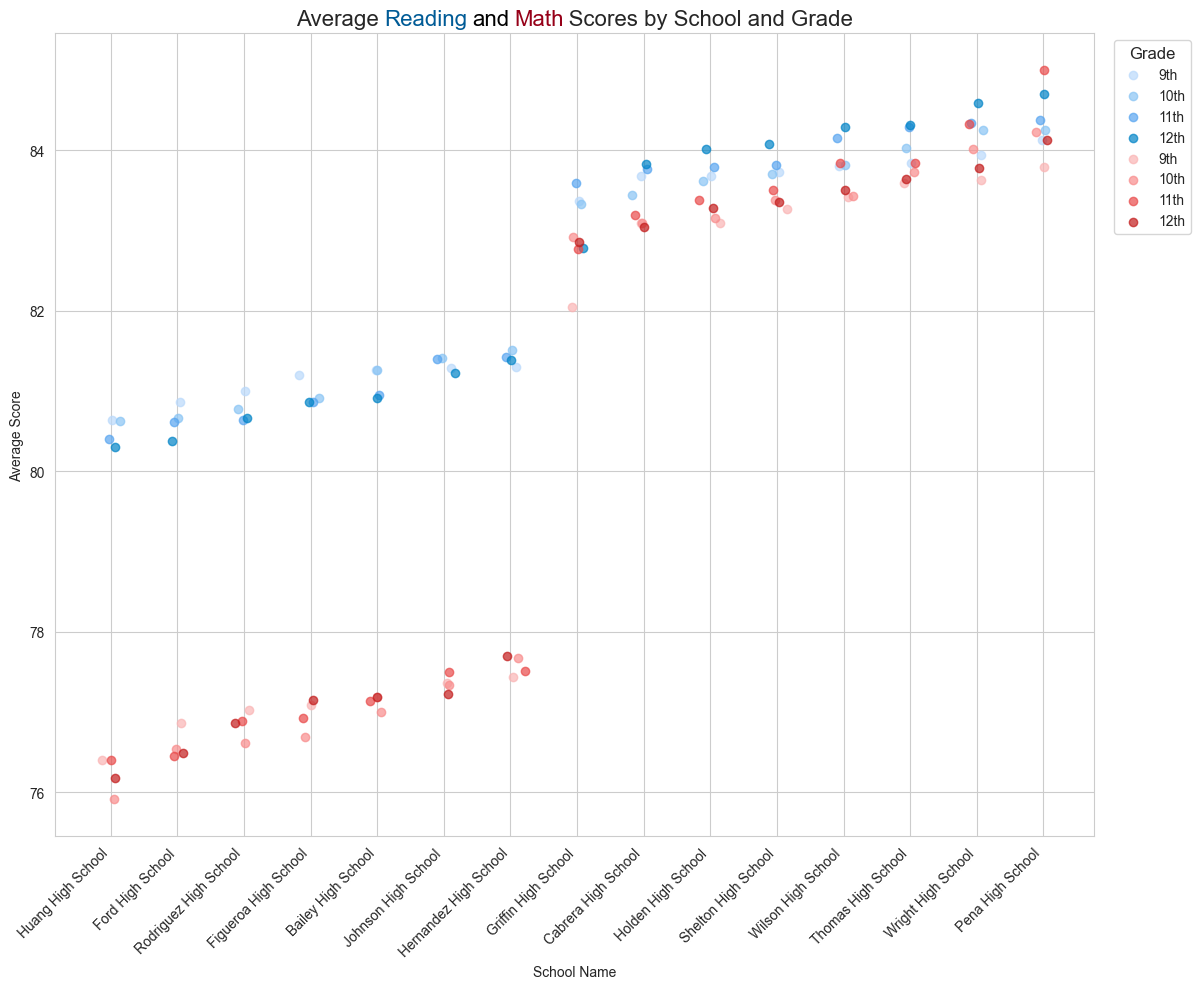

In [731]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a figure and set its size
fig, ax = plt.subplots(figsize=(12, 10))

# Define lists of colors for reading and math grades with better complementing shades
reading_colors = ['#bad9fb', '#89c4f4',  '#58a5f0', '#0284c7', '#005b96']
math_colors = ['#fab4b4', '#f88c8c', '#e94b4b', '#c31d1d', '#960018']

for i, subject in enumerate(['reading', 'math']):
    # Your data manipulation code
    df_subject = merged_df.pivot_table(index='school_name', columns='grade', values=f'{subject}_score', aggfunc='mean', fill_value=0)[grades].reset_index()
    df_subject_melted = pd.melt(df_subject, id_vars='school_name', var_name='grade', value_name=f'average_{subject}_score')
    
    # Sort the DataFrame by average score
    df_subject_melted.sort_values(by=f'average_{subject}_score', inplace=True)
    
    # Get the unique school names and their average scores
    sorted_schools = df_subject_melted['school_name'].unique()
    
    # Plot the data using scatter plots for each grade
    for j, grade in enumerate(grades):
        x_values = np.arange(len(sorted_schools))
        y_values = df_subject_melted[(df_subject_melted['grade'] == grade)][f'average_{subject}_score'].values
        jittered_x = x_values + np.random.normal(0, 0.07, len(sorted_schools))
        
        # Specify a color for the scatter plot based on the subject
        scatter_color = reading_colors[j] if subject == 'reading' else math_colors[j]
        
        ax.scatter(jittered_x, y_values, label=f'{grade}', c=scatter_color, alpha=0.7)

# Set the title with colored text
plt.title('Average                               Scores by School and Grade', loc='center', fontdict={'fontsize': 16})
plt.xlabel('School Name')
plt.xticks(np.arange(len(sorted_schools)), sorted_schools, rotation=45, ha='right')
plt.ylabel('Average Score')
plt.legend(title='Grade', title_fontsize='12', loc='best', bbox_to_anchor=(1.1, 1))

# Manually add colored text to the title using color names
fig.text(0.324, 0.969, 'Reading', color='#005b96', fontsize=16)
fig.text(0.398, 0.969, 'and', color='black', fontsize=16)
fig.text(0.433, 0.969, 'Math', color='#960018', fontsize=16)

plt.tight_layout()

plt.show()